# This notebook describes all the basic seaborns plots as of 0.9, using syndicate pipeline as an example. 

## General Notes:
1) Figsize is used to determine how large the picture shows in console (if items look squished increase the size)
<br>
2) Use help(data.distplot) to see documentation, replace distplot with whatever function you want.
<br>
3) Jitter is generally an addition on graphs to show std changes

The first cell is just used to import pkgs and load the data, as well as setting our default style to ticks.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("ticks") #darkgrid, whitegrid, dark, white, ticks. RC is for more customization of the graphic

# reading the data
data = pd.read_csv(r'F:\Python Scripts\python data sets\home data\train.csv', index_col='Id')

## Histogram, KDE, or Rug: 
Histogram are the bars, KDE is the distribution line (True to show, false to hide). Rug is the frequency in each bar.

In [13]:
sns.distplot(data["Cushion"], hist=True, kde= False, rug=True, fit= stats.gamma);

KeyError: 'Cushion'

## Joint plot
This is just a histogram on top of a scatter, though this can be played with. The below is a hex, though kde or scatter are more common. Haven't really played with the outside plot so I'm not sure what can go there.

ZeroDivisionError: division by zero

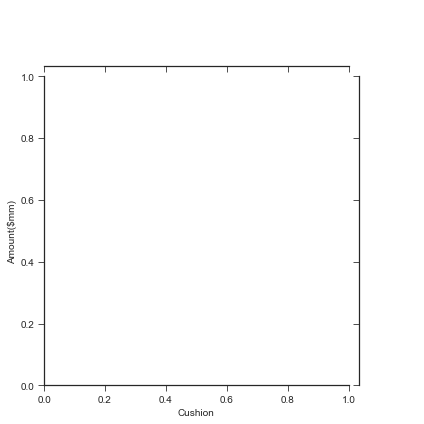

In [14]:
df = pd.DataFrame(data, columns=["Cushion", "Amount($mm)"])
with sns.axes_style("ticks"):
    sns.jointplot(x="Cushion",y = "Amount($mm)", data = df, kind = "hex", color="k");
# kind can be none for scatter, or hex, kde, 

## Pair Plots
These are useful for gauging a quick scatterplot and reg of all variables in a data set. To keep the output smaller, I've selected a single y_variable to plot against. Normally, all variables will be plotted and the diagonals will be histograms as the correlation would be 1 otherwise (plotting a variable against itself). 

KeyError: 'Amount($mm)'

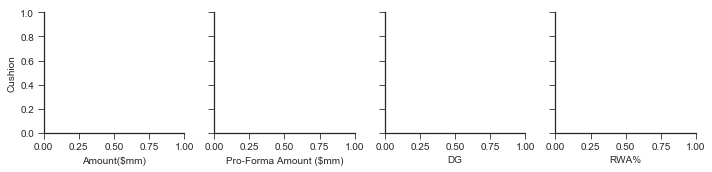

In [15]:
sns.pairplot(data,x_vars=["Amount($mm)", "Pro-Forma Amount ($mm)" , "DG", "RWA%"],
             y_vars=["Cushion"], kind = "reg")

## Heat Map
Input two categories and a value, good for tracking time series of prices or condition monitoring (maybe tracking sales) or across categories

In [16]:
data_heat = data.pivot(index="P&T",columns="Date",values="Cushion")
f,ax=plt.subplots(figsize=(18,12)) #fig print size
sns.heatmap(data_heat, annot=True, linewidths=.5,ax=ax)

KeyError: 'P&T'

## Box Plot
Great for comparing statiscal summaries/quartiles across categories or over time

In [17]:
sns.boxplot(x="Date",y="Pro-Forma Amount ($mm)", palette= ["b"], data = data)
sns.despine(offset=10, trim=True)

ValueError: Could not interpret input 'Date'

## Scatter or Relplot
This will be in matplotlib until I have 0.9 seaborn access

In [18]:
data.plot(kind="scatter", x = "Cushion", y = "Amount($mm)", 
          alpha = 1, s=data["Pro-Forma Amount ($mm)"], figsize=(10,10), 
          c="DG", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

KeyError: 'Pro-Forma Amount ($mm)'